# **🧍Human Activity Recognition**

In [21]:
# import libraries
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mpl_toolkits import mplot3d
from pylab import rcParams

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam


import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.facecolor':'#ffffff'})

In [22]:
# load data
df_train = pd.read_csv('datasets\example data/train.csv/train.csv')
df_test = pd.read_csv('datasets\example data/test.csv/test.csv')

In [23]:
# shape data
print(f"Train Dataset Shape: {df_train.shape}")
print(f"Test Dataset Shape: {df_test.shape}")

Train Dataset Shape: (7352, 563)
Test Dataset Shape: (2947, 563)


In [24]:
# missing data counts
print(f"Train Dataset Missing Data Counts: {df_train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {df_test.isna().sum().sum()}")

Train Dataset Missing Data Counts: 0
Test Dataset Missing Data Counts: 0


In [25]:
# duplicates data counts
print(f"Train Dataset Duplicate Data Counts: {df_train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {df_test.duplicated().sum()}")

Train Dataset Duplicate Data Counts: 0
Test Dataset Duplicate Data Counts: 0


findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.


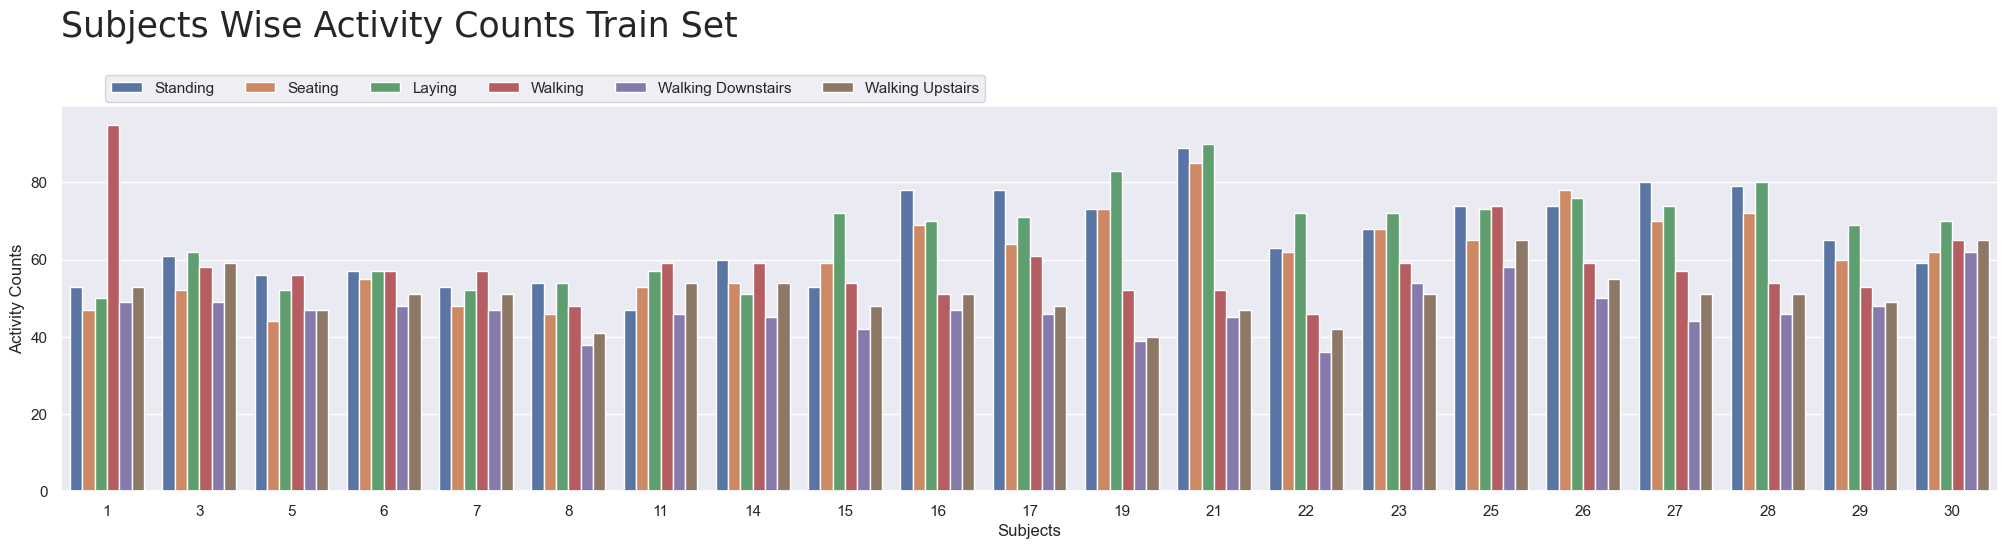

<Figure size 500x500 with 0 Axes>

In [26]:
# check data balanced or not for train
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=df_train, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["Standing", "Seating", "Laying", "Walking", "Walking Downstairs", "Walking Upstairs"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts Train Set", fontsize=25, loc='left', pad=50, fontfamily="roboto")
plt.show()


plt.figure(figsize=(5, 5))
label_counts = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Acticity Counts Distribution Train Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.
findfont: Font family 'roboto' not found.


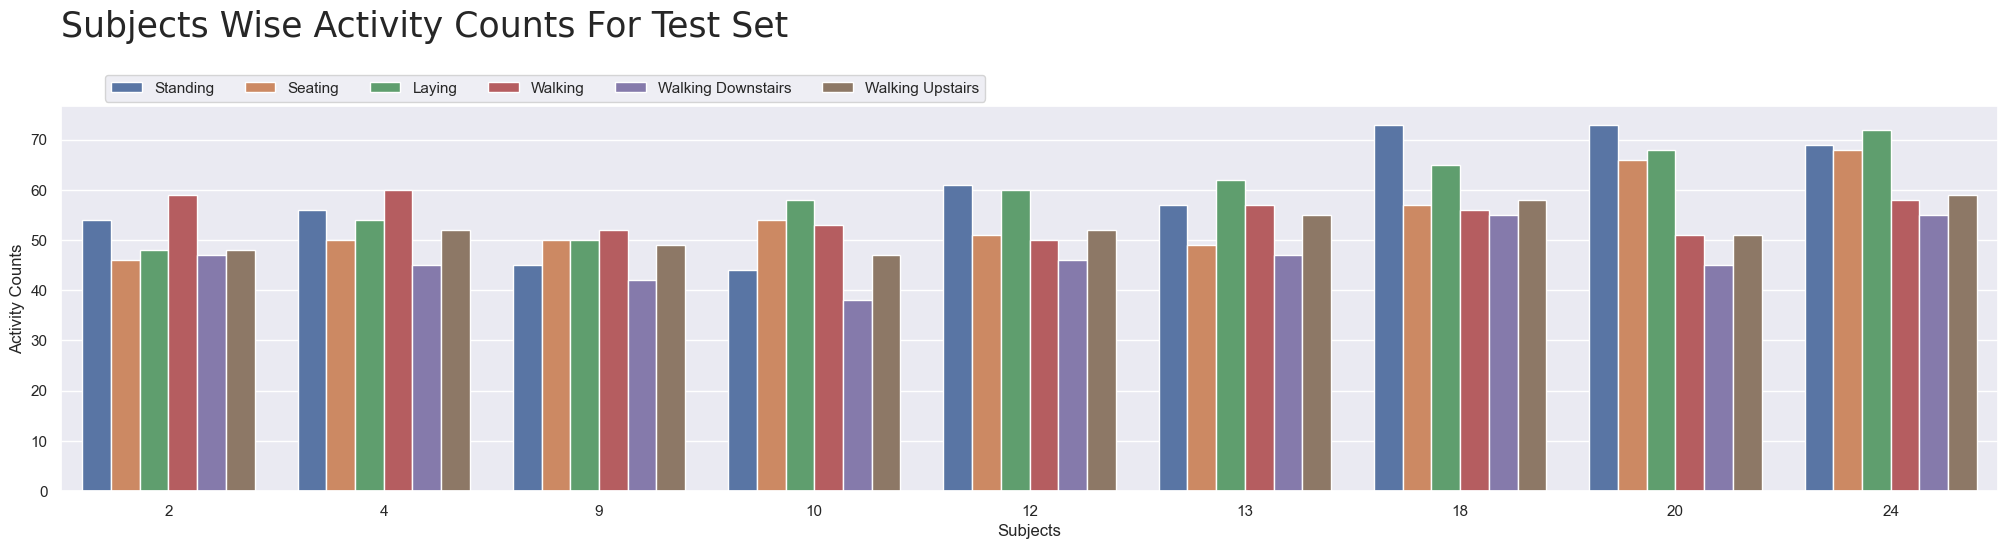

<Figure size 500x500 with 0 Axes>

In [27]:
# check data balanced or not for train
plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=df_test, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["Standing", "Seating", "Laying", "Walking", "Walking Downstairs", "Walking Upstairs"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts For Test Set", fontsize=25, loc='left', pad=50, fontfamily="roboto")
plt.show()


plt.figure(figsize=(5, 5))
label_counts = df_test['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Acticity Counts Distribution For Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

In [28]:
# Acticity Counts Distribution For Train & Test Set using pie chart
label_counts_for_train = df_train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

label_counts_for_test = df_test['Activity'].value_counts()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_train.index, values=label_counts_for_train.values, name="Train Set"), 1, 1)
fig.add_trace(go.Pie(hole=0.5, labels=label_counts_for_test.index, values=label_counts_for_test.values, name="Test Set"), 1, 2)

fig.update_layout(
#     height=450, width=1100,
    title = 'Acticity Counts Distribution For Train & Test Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
#     margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
# graph = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
fig.show()

In [29]:
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig = go.Figure()
fig.add_trace(go.Box(y=df_train['subject'], name="Train Set", notched=True))
fig.add_trace(go.Box( y=df_test['subject'], name="Test Set", notched=True))


fig.update_xaxes(showgrid=False)
fig.update_layout(
    title="Check Outliers In Train & Test",
    height=500, width=500,
    title_font=dict(size=25, color='#a5a7ab', family='Muli'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


In [30]:
# Accelerometer & Gyroscope Columns Counts
acc = 0
gyro = 0
other = 0

for value in df_train.columns:
    if "Acc" in str(value):
        acc += 1
    elif "Gyro" in str(value):
        gyro += 1
    else:
        other += 1

graph = go.Bar(x=['Accelerometer', 'Gyroscope', 'Others'], y=[acc,gyro,other], marker = dict(color = colors))
layout = go.Layout(
    height=450, width=500,
    title = 'Accelerometer & Gyroscope Columns Counts',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

In [31]:
pd.crosstab(df_train.subject, df_train.Activity, margins = True).style.background_gradient(cmap='Paired')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [32]:
pd.crosstab(df_test.subject, df_test.Activity, margins = True).style.background_gradient(cmap='Paired')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
2,48,46,54,59,47,48,302
4,54,50,56,60,45,52,317
9,50,50,45,52,42,49,288
10,58,54,44,53,38,47,294
12,60,51,61,50,46,52,320
13,62,49,57,57,47,55,327
18,65,57,73,56,55,58,364
20,68,66,73,51,45,51,354
24,72,68,69,58,55,59,381


In [33]:
# update columns name
columns_name = df_train.columns

columns_name = columns_name.str.replace('[()]','')
columns_name = columns_name.str.replace('[-]', '')
columns_name = columns_name.str.replace('[,]','')

df_train.columns = columns_name
df_train.columns = columns_name

In [36]:
plt.figure(figsize=(20, 5))
bbox = dict(boxstyle ="larrow,pad=0.5", fc="w", ec="b", lw=2)
  
sns.set_context(context='poster', font_scale=0.5)
sns.kdeplot(df_train['tBodyAccMagmean'], hue=df_train['Activity'])

plt.annotate(
    text="Static Activities",
    xy=(-0.9, 1.5),
    bbox = bbox,
    rotation=15)
plt.annotate(
    text="Dynamic Activities",
    xy=(0.0, 0.5),
    bbox = bbox,
    rotation=45)
plt.title('Static Activities & Dynamic Activities Distributions Using "tBodyAccMagmean"', loc='left', fontsize=20, pad=20)
plt.show()

KeyError: 'tBodyAccMagmean'

<Figure size 2000x500 with 0 Axes>

In [37]:
plt.figure(figsize=(20, 5))
bbox = dict(boxstyle ="larrow,pad=0.5", fc="w", ec="b", lw=2)
  
sns.set_context(context='poster', font_scale=0.5)
sns.kdeplot(df_train['angleXgravityMean'], hue=df_train['Activity'])

plt.title('Static Activities & Dynamic Activities Distributions Using "angleXgravityMean"', loc='left', fontsize=20, pad=20)
plt.show()

KeyError: 'angleXgravityMean'

<Figure size 2000x500 with 0 Axes>

In [38]:
plt.figure(figsize=(20, 5))
bbox = dict(boxstyle ="larrow,pad=0.5", fc="w", ec="b", lw=2)
  
sns.set_context(context='poster', font_scale=0.5)
sns.kdeplot(df_train['angleYgravityMean'], hue=df_train['Activity'])

plt.title('Static Activities & Dynamic Activities Distributions Using "angleYgravityMean"', loc='left', fontsize=20, pad=20)
plt.show()

KeyError: 'angleYgravityMean'

<Figure size 2000x500 with 0 Axes>

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 1.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.026878
[t-SNE] KL divergence after 1000 iterations: 1.295253


<Axes: >

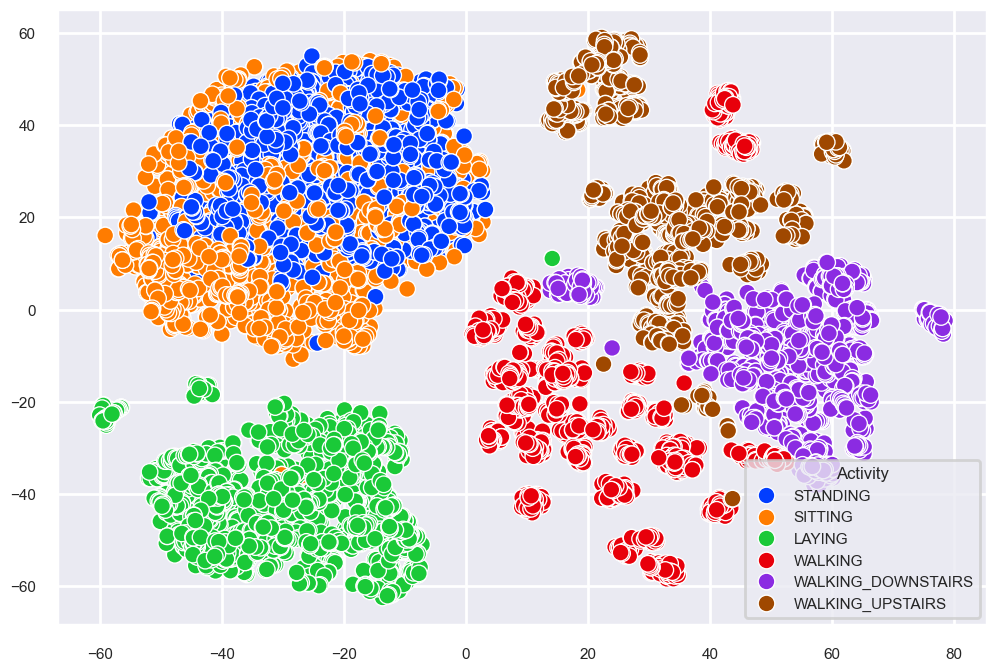

In [39]:
# t-sne (2D)
x_for_tsne = df_train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df_train["Activity"],palette="bright")

In [40]:
# t-sne (3D)
x_for_tsne = df_train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=3, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.022s...
[t-SNE] Computed neighbors for 7352 samples in 0.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.092224
[t-SNE] KL divergence after 1000 iterations: 1.139968


In [42]:
fig = px.scatter_3d(
    x =tsne[:, 0],
    y = tsne[:, 1],
    z = tsne[:, 2],
    color=df_train['Activity']
)
fig.update_layout(
    title="Cluster Of Activities",
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.show()

In [43]:
X_train, y_train = df_train.drop(['subject', 'Activity'], axis=1), df_train['Activity']

In [44]:
X_test, y_test = df_test.drop(['subject', 'Activity'], axis=1), df_test['Activity']

In [45]:
# pca with all comonents
pca = PCA()
X_pca = pca.fit_transform(X_train)

# print(pca.n_components_)
# print(pca.explained_variance_ratio_)
# print(np.cumsum(pca.explained_variance_ratio_))
fig = px.line(np.cumsum(pca.explained_variance_ratio_))
fig.update_layout(
    title="Screeplot Of All Principsl Components",
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    paper_bgcolor='#2d3035', plot_bgcolor='#2d3035',
    font=dict(color='#a5a7ab'),
    showlegend=False,
    

)
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='#a5a7ab')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#a5a7ab')


In [46]:
# pca with 95% info
pca = PCA(0.95)

pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [47]:
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 67), (7352,), (2947, 67), (2947,))

In [49]:
# ML Modelling

In [50]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(15,5)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    plt.grid(b=False)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [51]:
# logistic regresssion
lr_model = LogisticRegression()

params = {
    'C': np.arange(10,61,10),
    'penalty': ['l2','l1']
}

random_cv = RandomizedSearchCV(lr_model, param_distributions=params, cv=5, random_state=42)
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([10, 20, 30, 40, 50, 60]),
                                        'penalty': ['l2', 'l1']},
                   random_state=42)

In [52]:
lr_model = LogisticRegression(penalty='l2', C=10,solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 0)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", lr_accuracy)

Accuracy Of Logistic Regression :  0.9399389209365456


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

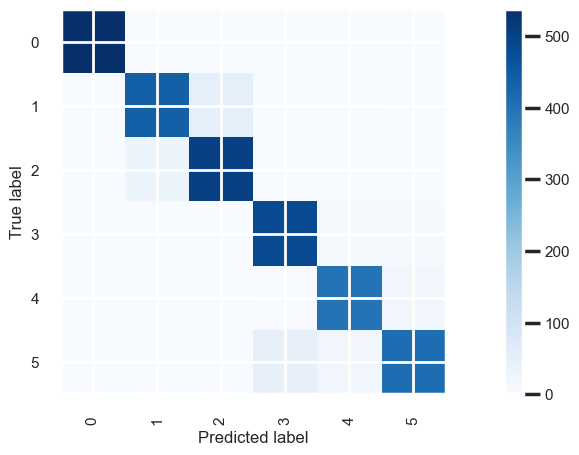

In [53]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  

In [54]:
# svc
params = {
    'C':[2,4,8,16],
    'gamma': [0.125, 0.250, 0.5, 1]
}
svm_model = SVC(kernel='rbf')

random_cv = RandomizedSearchCV(svm_model, param_distributions=params, random_state = 42, verbose=10)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=2, gamma=0.125...........................................
[CV 1/5; 1/10] END ............C=2, gamma=0.125;, score=0.909 total time=   1.5s
[CV 2/5; 1/10] START C=2, gamma=0.125...........................................
[CV 2/5; 1/10] END ............C=2, gamma=0.125;, score=0.865 total time=   1.4s
[CV 3/5; 1/10] START C=2, gamma=0.125...........................................
[CV 3/5; 1/10] END ............C=2, gamma=0.125;, score=0.918 total time=   1.5s
[CV 4/5; 1/10] START C=2, gamma=0.125...........................................
[CV 4/5; 1/10] END ............C=2, gamma=0.125;, score=0.888 total time=   1.5s
[CV 5/5; 1/10] START C=2, gamma=0.125...........................................
[CV 5/5; 1/10] END ............C=2, gamma=0.125;, score=0.956 total time=   1.6s
[CV 1/5; 2/10] START C=2, gamma=0.25............................................
[CV 1/5; 2/10] END .............C=2, gamma=0.25;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [2, 4, 8, 16],
                                        'gamma': [0.125, 0.25, 0.5, 1]},
                   random_state=42, verbose=10)

In [ ]:
random_cv.best_params_

In [ ]:
svc_model = SVC(gamma=0.125, C=2)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", svc_accuracy)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
# decision tree
params = {'max_depth':np.arange(2,10,2)}

dt_model = DecisionTreeClassifier()
random_cv = RandomizedSearchCV(dt_model, param_distributions=params, random_state = 42)
random_cv.fit(X_train, y_train)

In [ ]:
random_cv.best_params_

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", dt_accuracy)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
# random forest
params = {
    'n_estimators': np.arange(20,101,10),
    'max_depth':np.arange(2,16,2),
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]
}
rf_model = RandomForestClassifier()
random_cv = RandomizedSearchCV(rf_model, param_distributions=params,random_state = 42, verbose=10)
random_cv.fit(X_train, y_train)

In [ ]:
random_cv.best_params_

In [ ]:
rf_model = RandomForestClassifier(n_estimators=90,
                                  max_features='auto',
                                  max_depth=14,
                                  bootstrap=True)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", rf_accuracy)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
# # xgboost
# params={
#     "max_depth": [6, 8, 10, 12, 15],
#     "gamma": [0.2, 0.3, 0.4],
# }
# xgb_model = xgboost.XGBClassifier()
# random_cv = RandomizedSearchCV(xgb_model, param_distributions=params, cv=2, n_iter=5, scoring='roc_auc', n_jobs=-1, verbose=100)
# random_cv.fit(X_train, y_train)

In [ ]:
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression : ", xgb_accuracy)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:

estimators = [
        ('RFC' ,RandomForestClassifier(n_estimators=500, random_state = 42)),
        ('KNC', KNeighborsClassifier(5)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', SVC(kernel="rbf")),
        ('XGB', xgboost.XGBClassifier()),
        ('RC',  RidgeClassifier())
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier()
)

In [ ]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=256,epochs=100,validation_data=(X_test,y_test))

In [ ]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model_name = ['LR', 'SVC', 'DT', 'RF', 'XGB', 'Stacking', 'DeepLearning']
model_acc1 = [ 0.9392, 0.9477, 0.80590, 0.90661, 0.9222, 0.93827, 0.959]
model_acc = [np.round(i, decimals=2) for i in model_acc1]

In [ ]:

graph = go.Bar(
    x=model_name,
    y=model_acc,
    opacity=1,
    showlegend=False,
    marker=dict(color=px.colors.qualitative.Pastel1)

)

layout = go.Layout(
    height=450, width=700,
    title = 'Model Accuracy Chart',
    xaxis = dict(title = 'Model', showgrid=False,tickangle=0),
    yaxis = dict(title = 'Accuracy', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family='roboto'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))
iplot(fig)
